In [ ]:
#%pip install pandas
#%pip install seaborn
#%pip install matplotlib
#%pip install numpy
#%pip install scikit-learn

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
PROJECT_PATH = 'data_ite_v1.csv'

In [6]:
dataset = pd.read_csv(PROJECT_PATH)
dataset = dataset.drop(['Unnamed: 0','QuestionNumber','Participant','Brand','Participant_Stimuli','ResponseCode'], axis=1)
dataset.head()

,Brand_First_Char,Hbo_Op1,Hbo_Op2,Hbo_Op3,Hbo_Op4,Hbo_Op5,Hbo_Op6,Hbo_Op7,Hbo_Op8,Hbo_Op9,...,Oxy_Op7,Oxy_Op8,Oxy_Op9,Oxy_Op10,Oxy_Op11,Oxy_Op12,Oxy_Op13,Oxy_Op14,Oxy_Op15,Oxy_Op16
0,N,-0.262598,-0.619927,-0.248286,-0.006671,-0.017983,-0.173565,-0.043622,-0.091076,0.105359,...,0.073413,0.095273,0.046544,0.055122,0.102596,-0.036309,-0.035766,0.008657,-0.000563,-0.490804
1,N,-0.395267,0.001335,-0.578758,-0.006755,-0.500375,-0.545892,-0.413575,-0.285942,-0.250314,...,-0.493665,-0.123367,-0.321700,-0.286262,-0.640002,-0.505478,-1.251273,-0.606763,-0.715185,-0.271742
2,N,-0.315036,0.000858,-0.277996,-0.006723,0.000567,-0.004692,-0.014951,0.022559,-0.056654,...,0.065354,0.219873,-0.002850,0.065340,-0.025291,-0.010906,-0.035855,-0.549660,-0.549899,-0.453857
3,N,-0.313166,-0.153458,-0.214679,-0.006712,0.115662,0.073968,0.142529,0.136461,0.170168,...,0.298825,0.372833,0.355605,0.616326,0.526357,0.527409,0.122733,-0.265508,-0.108831,-0.312787
4,N,0.089333,-0.018636,0.058641,-0.006613,-0.003365,0.009435,0.013813,0.007992,0.021373,...,-0.005889,-0.002794,-0.055797,0.085864,-0.011880,0.130017,0.186452,-0.063011,-0.033269,-0.157341


In [7]:
X = dataset.drop(['Brand_First_Char'], axis=1)
y = dataset['Brand_First_Char']

In [8]:
X['sum_Hbo'] =  X.loc[:, 'Hbo_Op1': 'Hbo_Op16'].sum(axis=1)
X['sum_Hbr'] =  X.loc[:, 'Hbr_Op1': 'Hbr_Op16'].sum(axis=1)
X['sum_Hbt'] =  X.loc[:, 'Hbt_Op1': 'Hbt_Op16'].sum(axis=1)
X['sum_Oxy'] =  X.loc[:, 'Oxy_Op1': 'Oxy_Op16'].sum(axis=1)

In [9]:
X.columns

Index(['Hbo_Op1', 'Hbo_Op2', 'Hbo_Op3', 'Hbo_Op4', 'Hbo_Op5', 'Hbo_Op6',
       'Hbo_Op7', 'Hbo_Op8', 'Hbo_Op9', 'Hbo_Op10', 'Hbo_Op11', 'Hbo_Op12',
       'Hbo_Op13', 'Hbo_Op14', 'Hbo_Op15', 'Hbo_Op16', 'Hbr_Op1', 'Hbr_Op2',
       'Hbr_Op3', 'Hbr_Op4', 'Hbr_Op5', 'Hbr_Op6', 'Hbr_Op7', 'Hbr_Op8',
       'Hbr_Op9', 'Hbr_Op10', 'Hbr_Op11', 'Hbr_Op12', 'Hbr_Op13', 'Hbr_Op14',
       'Hbr_Op15', 'Hbr_Op16', 'Hbt_Op1', 'Hbt_Op2', 'Hbt_Op3', 'Hbt_Op4',
       'Hbt_Op5', 'Hbt_Op6', 'Hbt_Op7', 'Hbt_Op8', 'Hbt_Op9', 'Hbt_Op10',
       'Hbt_Op11', 'Hbt_Op12', 'Hbt_Op13', 'Hbt_Op14', 'Hbt_Op15', 'Hbt_Op16',
       'Oxy_Op1', 'Oxy_Op2', 'Oxy_Op3', 'Oxy_Op4', 'Oxy_Op5', 'Oxy_Op6',
       'Oxy_Op7', 'Oxy_Op8', 'Oxy_Op9', 'Oxy_Op10', 'Oxy_Op11', 'Oxy_Op12',
       'Oxy_Op13', 'Oxy_Op14', 'Oxy_Op15', 'Oxy_Op16', 'sum_Hbo', 'sum_Hbr',
       'sum_Hbt', 'sum_Oxy'],
      dtype='object')

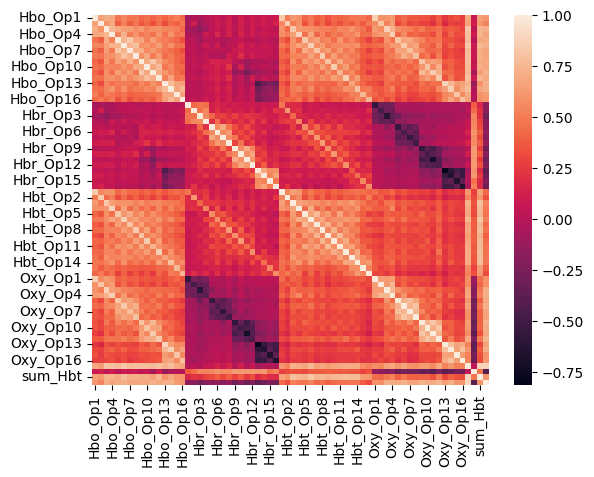

In [10]:
sns.heatmap(pd.DataFrame(X).corr())
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Train Test Split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
# Standard Scaler
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [18]:
scaled_df = pd.DataFrame(Xtrain_scaled, columns = X.columns)
scaled_df.head()

,Hbo_Op1,Hbo_Op2,Hbo_Op3,Hbo_Op4,Hbo_Op5,Hbo_Op6,Hbo_Op7,Hbo_Op8,Hbo_Op9,Hbo_Op10,...,Oxy_Op11,Oxy_Op12,Oxy_Op13,Oxy_Op14,Oxy_Op15,Oxy_Op16,sum_Hbo,sum_Hbr,sum_Hbt,sum_Oxy
0,-1.776161,-2.053333,-1.875134,-1.231261,-1.849703,-2.234118,-1.719632,-1.363498,-2.311888,-1.897975,...,-1.396707,-2.283046,-1.388528,-1.903784,-1.271191,-0.662882,-2.533320,0.237931,-2.112752,-2.396195
1,0.013548,-0.102743,-0.262490,-0.278298,-0.384308,-0.900896,-0.831991,-1.281766,-0.150167,-1.069292,...,1.724257,-0.288222,0.686301,0.271971,0.012391,0.002814,-0.482659,-0.875057,-0.818217,-0.028703
2,0.013515,0.192006,-0.022309,-0.231605,0.233090,0.852206,1.185972,1.582665,0.917487,0.683477,...,0.257907,0.344192,0.743925,0.447148,1.047499,0.834538,0.914081,0.527462,1.039337,0.579324
3,-0.565626,-0.482875,-1.003307,-1.658148,-1.061701,-2.051237,-0.562221,-0.788678,0.880847,0.128501,...,0.396402,-0.116925,1.530004,0.924883,0.551337,2.726017,-0.335713,-2.085517,-1.236097,0.666612
4,0.204950,0.003109,0.208064,0.280557,0.665538,0.585323,0.308734,1.096009,0.775357,0.295104,...,1.055772,1.097297,1.312754,1.750804,0.029914,0.025746,0.585612,-1.454786,-0.143855,1.204969


In [19]:
from sklearn.decomposition import PCA

In [34]:
# PCA
pca = PCA(n_components = 0.95)
Xtrain_pca = pca.fit_transform(Xtrain_scaled)
Xtest_pca = pca.transform(Xtest_scaled)

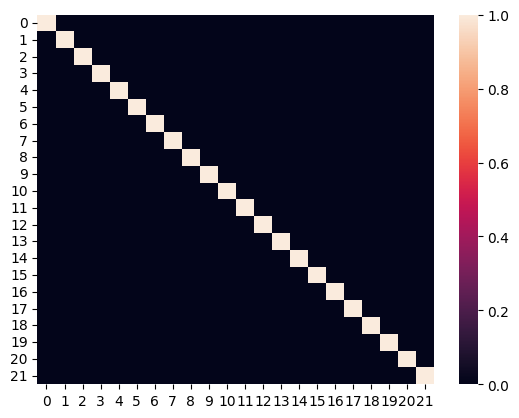

In [35]:
sns.heatmap(pd.DataFrame(Xtrain_pca).corr())
plt.show()

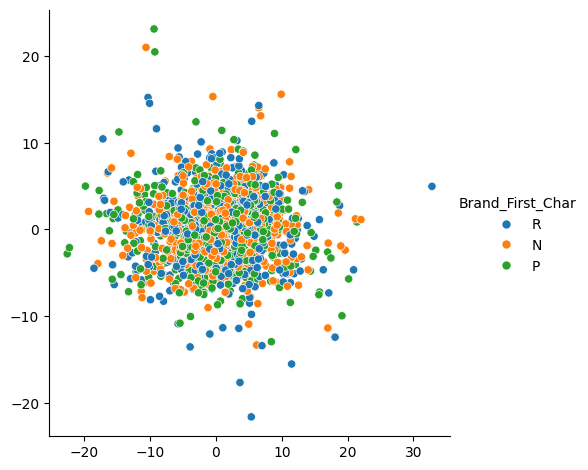

In [36]:
sns.relplot(x=Xtrain_pca[:,0], y=Xtrain_pca[:,1], hue=ytrain)

# Random Forest Classifier with PCA

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble        import RandomForestClassifier

In [38]:
# Grid Search for Random Forest Classifier
RFC = RandomForestClassifier()

paramsRF = {
    'n_estimators':[50, 100, 500, 1000],
    'max_depth': [10, 20, 30]
}

gridRFR = GridSearchCV(estimator = RFC, param_grid = paramsRF, cv = 5, verbose = 3, refit = True, n_jobs = -1)

gridRFR.fit(Xtrain_pca, ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 3/5] END .....max_depth=10, n_estimators=50;, score=0.308 total time=   1.1s
[CV 5/5] END .....max_depth=10, n_estimators=50;, score=0.339 total time=   1.1s
[CV 1/5] END .....max_depth=10, n_estimators=50;, score=0.316 total time=   1.1s
[CV 2/5] END .....max_depth=10, n_estimators=50;, score=0.319 total time=   1.1s
[CV 4/5] END .....max_depth=10, n_estimators=50;, score=0.326 total time=   1.1s
[CV 3/5] END ....max_depth=10, n_estimators=100;, score=0.316 total time=   2.0s
[CV 2/5] END ....max_depth=10, n_estimators=100;, score=0.319 total time=   2.1s
[CV 1/5] END ....max_depth=10, n_estimators=100;, score=0.307 total time=   2.1s
[CV 4/5] END ....max_depth=10, n_estimators=100;, score=0.317 total time=   1.8s
[CV 5/5] END ....max_depth=10, n_estimators=100;, score=0.330 total time=   1.9s
[CV 1/5] END ....max_depth=10, n_estimators=500;, score=0.298 total time=  10.7s
[CV 2/5] END ....max_depth=10, n_estimators=500;

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 500, 1000]},
             verbose=3)

In [39]:
best_params = gridRFR.best_params_
print(best_params)

{'max_depth': 30, 'n_estimators': 100}


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
prediction = gridRFR.predict(Xtest_pca)

In [42]:
print(classification_report(ytest, prediction))
print(confusion_matrix(ytest, prediction, labels = ['N', 'R', 'P']))

              precision    recall  f1-score   support

           N       0.29      0.27      0.28       375
           P       0.31      0.35      0.33       368
           R       0.32      0.29      0.31       382

    accuracy                           0.31      1125
   macro avg       0.31      0.31      0.31      1125
weighted avg       0.31      0.31      0.31      1125

[[103 118 154]
 [131 111 140]
 [125 113 130]]


# Random Forest Classifier without PCA

In [43]:
# Grid Search for Random Forest Classifier
RFC = RandomForestClassifier()

paramsRF = {
    'n_estimators':[50, 100, 500, 1000],
    'max_depth': [10, 20, 30]
}

gridRFR = GridSearchCV(estimator = RFC, param_grid = paramsRF, cv = 5, verbose = 3, refit = True, n_jobs = -1)

gridRFR.fit(Xtrain_scaled, ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 4/5] END .....max_depth=10, n_estimators=50;, score=0.474 total time=   2.5s
[CV 3/5] END .....max_depth=10, n_estimators=50;, score=0.455 total time=   2.5s
[CV 2/5] END .....max_depth=10, n_estimators=50;, score=0.501 total time=   2.5s
[CV 5/5] END .....max_depth=10, n_estimators=50;, score=0.467 total time=   2.7s
[CV 1/5] END .....max_depth=10, n_estimators=50;, score=0.447 total time=   2.7s
[CV 3/5] END ....max_depth=10, n_estimators=100;, score=0.441 total time=   4.5s
[CV 1/5] END ....max_depth=10, n_estimators=100;, score=0.437 total time=   4.5s
[CV 2/5] END ....max_depth=10, n_estimators=100;, score=0.462 total time=   4.5s
[CV 4/5] END ....max_depth=10, n_estimators=100;, score=0.471 total time=   3.5s
[CV 5/5] END ....max_depth=10, n_estimators=100;, score=0.456 total time=   3.8s
[CV 1/5] END ....max_depth=10, n_estimators=500;, score=0.449 total time=  16.8s
[CV 2/5] END ....max_depth=10, n_estimators=500;

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 500, 1000]},
             verbose=3)

In [44]:
best_params = gridRFR.best_params_
print(best_params)

{'max_depth': 10, 'n_estimators': 500}


In [46]:
prediction = gridRFR.predict(Xtest_scaled)

In [47]:
print(classification_report(ytest, prediction))
print(confusion_matrix(ytest, prediction, labels = ['N', 'R', 'P']))

              precision    recall  f1-score   support

           N       0.52      0.49      0.50       375
           P       0.48      0.64      0.55       368
           R       0.42      0.31      0.36       382

    accuracy                           0.48      1125
   macro avg       0.47      0.48      0.47      1125
weighted avg       0.47      0.48      0.47      1125

[[182  91 102]
 [112 120 150]
 [ 57  77 234]]


# Gradient Boosting Classifier with PCA

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
GBC = GradientBoostingClassifier()

paramsGBC = {
    'n_estimators': [50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2]
}

gridGBC = GridSearchCV(estimator=GBC, param_grid=paramsGBC, cv=5, refit=True, n_jobs=-1, verbose=3)

gridGBC.fit(Xtrain_pca, ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 2/5] END learning_rate=0.01, n_estimators=50;, score=0.320 total time=   8.2s
[CV 4/5] END learning_rate=0.01, n_estimators=50;, score=0.354 total time=   8.3s
[CV 3/5] END learning_rate=0.01, n_estimators=50;, score=0.323 total time=   8.4s
[CV 1/5] END learning_rate=0.01, n_estimators=50;, score=0.356 total time=   8.6s
[CV 5/5] END learning_rate=0.01, n_estimators=50;, score=0.363 total time=   8.6s
[CV 2/5] END learning_rate=0.01, n_estimators=100;, score=0.332 total time=  22.1s
[CV 1/5] END learning_rate=0.01, n_estimators=100;, score=0.356 total time=  22.1s
[CV 3/5] END learning_rate=0.01, n_estimators=100;, score=0.341 total time=  22.4s
[CV 5/5] END learning_rate=0.01, n_estimators=100;, score=0.363 total time=  22.4s
[CV 4/5] END learning_rate=0.01, n_estimators=100;, score=0.336 total time=  22.5s
[CV 3/5] END learning_rate=0.01, n_estimators=500;, score=0.319 total time= 1.4min
[CV 1/5] END learning_rate=0.01

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 500, 1000]},
             verbose=3)

In [65]:
best_params = gridGBC.best_params_
print(best_params)

{'learning_rate': 0.01, 'n_estimators': 100}


In [67]:
prediction = gridGBC.predict(Xtest_pca)

In [68]:
print(classification_report(ytest, prediction))
print(confusion_matrix(ytest, prediction, labels = ['N', 'R', 'P']))

              precision    recall  f1-score   support

           N       0.33      0.35      0.34       375
           P       0.33      0.51      0.40       368
           R       0.37      0.15      0.21       382

    accuracy                           0.34      1125
   macro avg       0.34      0.34      0.32      1125
weighted avg       0.34      0.34      0.32      1125

[[132  50 193]
 [137  57 188]
 [133  46 189]]


# Gradient Boosting Classifier without PCA

In [58]:
GBC = GradientBoostingClassifier()

paramsGBC = {
    'n_estimators': [50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2]
}

gridGBC = GridSearchCV(estimator=GBC, param_grid=paramsGBC, cv=5, refit=True, n_jobs=-1, verbose=3)

gridGBC.fit(Xtrain_scaled, ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[CV 3/5] END learning_rate=0.01, n_estimators=50;, score=0.433 total time=  17.1s
[CV 5/5] END learning_rate=0.01, n_estimators=50;, score=0.471 total time=  17.3s
[CV 4/5] END learning_rate=0.01, n_estimators=50;, score=0.443 total time=  17.2s
[CV 2/5] END learning_rate=0.01, n_estimators=50;, score=0.428 total time=  17.3s
[CV 1/5] END learning_rate=0.01, n_estimators=50;, score=0.431 total time=  17.4s
[CV 3/5] END learning_rate=0.01, n_estimators=100;, score=0.440 total time=  34.9s
[CV 2/5] END learning_rate=0.01, n_estimators=100;, score=0.462 total time=  35.4s
[CV 1/5] END learning_rate=0.01, n_estimators=100;, score=0.427 total time=  35.7s
[CV 5/5] END learning_rate=0.01, n_estimators=100;, score=0.465 total time=  36.6s
[CV 4/5] END learning_rate=0.01, n_estimators=100;, score=0.459 total time=  36.9s
[CV 1/5] END learning_rate=0.01, n_estimators=500;, score=0.464 total time= 3.1min
[CV 3/5] END learning_rate=0.01, n_estimators=500;, score=0.468 total time= 3.1min
[CV 2/5] 

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 500, 1000]},
             verbose=3)

In [59]:
best_params = gridGBC.best_params_
print(best_params)

{'learning_rate': 0.01, 'n_estimators': 1000}


In [60]:
prediction = gridGBC.predict(Xtest_scaled)

In [61]:
print(classification_report(ytest, prediction))
print(confusion_matrix(ytest, prediction, labels = ['N', 'R', 'P']))

              precision    recall  f1-score   support

           N       0.53      0.53      0.53       375
           P       0.52      0.58      0.55       368
           R       0.39      0.35      0.37       382

    accuracy                           0.48      1125
   macro avg       0.48      0.49      0.48      1125
weighted avg       0.48      0.48      0.48      1125

[[198 107  70]
 [120 132 130]
 [ 53 101 214]]


# Random Forest Classification without Scaler and PCA

In [69]:
# Grid Search for Random Forest Classifier
RFC = RandomForestClassifier()

paramsRF = {
    'n_estimators':[50, 100, 500, 1000],
    'max_depth': [10, 20, 30]
}

gridRFR = GridSearchCV(estimator = RFC, param_grid = paramsRF, cv = 5, verbose = 3, refit = True, n_jobs = -1)

gridRFR.fit(Xtrain, ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 5/5] END .....max_depth=10, n_estimators=50;, score=0.436 total time=   1.4s
[CV 1/5] END .....max_depth=10, n_estimators=50;, score=0.461 total time=   1.4s
[CV 4/5] END .....max_depth=10, n_estimators=50;, score=0.449 total time=   1.4s
[CV 3/5] END .....max_depth=10, n_estimators=50;, score=0.456 total time=   1.4s
[CV 2/5] END .....max_depth=10, n_estimators=50;, score=0.464 total time=   1.5s
[CV 2/5] END ....max_depth=10, n_estimators=100;, score=0.462 total time=   3.3s
[CV 3/5] END ....max_depth=10, n_estimators=100;, score=0.470 total time=   3.5s
[CV 1/5] END ....max_depth=10, n_estimators=100;, score=0.446 total time=   3.8s
[CV 4/5] END ....max_depth=10, n_estimators=100;, score=0.455 total time=   3.9s
[CV 5/5] END ....max_depth=10, n_estimators=100;, score=0.461 total time=   4.0s
[CV 1/5] END ....max_depth=10, n_estimators=500;, score=0.441 total time=  16.0s
[CV 3/5] END ....max_depth=10, n_estimators=500;

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 500, 1000]},
             verbose=3)

In [70]:
best_params = gridRFR.best_params_
print(best_params)

{'max_depth': 20, 'n_estimators': 100}


In [72]:
prediction = gridRFR.predict(Xtest)

In [73]:
print(classification_report(ytest, prediction))
print(confusion_matrix(ytest, prediction, labels = ['N', 'R', 'P']))

              precision    recall  f1-score   support

           N       0.50      0.47      0.49       375
           P       0.46      0.56      0.50       368
           R       0.40      0.33      0.36       382

    accuracy                           0.45      1125
   macro avg       0.45      0.46      0.45      1125
weighted avg       0.45      0.45      0.45      1125

[[178  97 100]
 [111 127 144]
 [ 67  95 206]]
